#**Import Library**

In [1]:
import numpy as np
import pandas as pd
import random
import seaborn as sns
import math

from IPython.display import Image
from datetime import timedelta
from scipy import optimize
from scipy import stats
from mpl_toolkits.mplot3d import axes3d
from matplotlib import pyplot as plt
from datetime import timedelta, datetime

%matplotlib inline

In [2]:
dataset = "https://raw.githubusercontent.com/arifadli/DatasetRepository/main/Disertation/California/usgs_california_1968_2018.csv"
df = pd.read_csv(dataset)
df.head(5)

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,1968-01-01T07:50:51.240Z,32.958667,-115.863333,6.0,3.08,ml,5.0,166.0,0.7355,0.29,...,2016-01-28T19:54:48.710Z,"24km WSW of Westmorland, CA",earthquake,1.02,31.61,0.179,5.0,reviewed,ci,ci
1,1968-01-01T11:34:43.790Z,33.468333,-120.179500,6.0,2.59,mh,4.0,302.0,1.0440,0.63,...,2016-01-28T19:37:37.050Z,"53km S of Santa Rosa Is., CA",earthquake,5.56,31.61,0.306,12.0,reviewed,ci,ci
2,1968-01-02T09:50:46.470Z,35.705167,-118.039000,6.0,3.09,ml,8.0,84.0,0.3567,0.71,...,2016-01-28T19:33:22.000Z,"22km WNW of Inyokern, CA",earthquake,1.78,31.61,0.155,11.0,reviewed,ci,ci
3,1968-01-02T11:01:19.830Z,35.740667,-118.060833,6.0,2.88,ml,10.0,97.0,0.3452,0.52,...,2016-01-28T19:59:01.740Z,"25km WNW of Inyokern, CA",earthquake,1.13,31.61,0.167,9.0,reviewed,ci,ci
4,1968-01-04T06:12:39.730Z,35.111000,-119.085833,6.0,2.59,ml,9.0,146.0,0.2834,0.45,...,2016-01-28T19:54:49.210Z,"23km SW of Lamont, CA",earthquake,1.03,31.61,0.136,6.0,reviewed,ci,ci


In [3]:
print('Total Jumlah Kejadian Gempa:',df.shape[0])
df.head()

Total Jumlah Kejadian Gempa: 247808


,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,1968-01-01T07:50:51.240Z,32.958667,-115.863333,6.0,3.08,ml,5.0,166.0,0.7355,0.29,...,2016-01-28T19:54:48.710Z,"24km WSW of Westmorland, CA",earthquake,1.02,31.61,0.179,5.0,reviewed,ci,ci
1,1968-01-01T11:34:43.790Z,33.468333,-120.179500,6.0,2.59,mh,4.0,302.0,1.0440,0.63,...,2016-01-28T19:37:37.050Z,"53km S of Santa Rosa Is., CA",earthquake,5.56,31.61,0.306,12.0,reviewed,ci,ci
2,1968-01-02T09:50:46.470Z,35.705167,-118.039000,6.0,3.09,ml,8.0,84.0,0.3567,0.71,...,2016-01-28T19:33:22.000Z,"22km WNW of Inyokern, CA",earthquake,1.78,31.61,0.155,11.0,reviewed,ci,ci
3,1968-01-02T11:01:19.830Z,35.740667,-118.060833,6.0,2.88,ml,10.0,97.0,0.3452,0.52,...,2016-01-28T19:59:01.740Z,"25km WNW of Inyokern, CA",earthquake,1.13,31.61,0.167,9.0,reviewed,ci,ci
4,1968-01-04T06:12:39.730Z,35.111000,-119.085833,6.0,2.59,ml,9.0,146.0,0.2834,0.45,...,2016-01-28T19:54:49.210Z,"23km SW of Lamont, CA",earthquake,1.03,31.61,0.136,6.0,reviewed,ci,ci


In [4]:
# daftar jenis magnitude
df['magType'].value_counts()

mc     105597
mh      56644
ml      56105
md      28893
mw        307
ma        122
mun       118
mb         17
Ml          2
mlr         2
Name: magType, dtype: int64

In [5]:
mag_keep = np.asarray(df['magType'].value_counts().head(6).index)
mag_keep = mag_keep.astype(str)

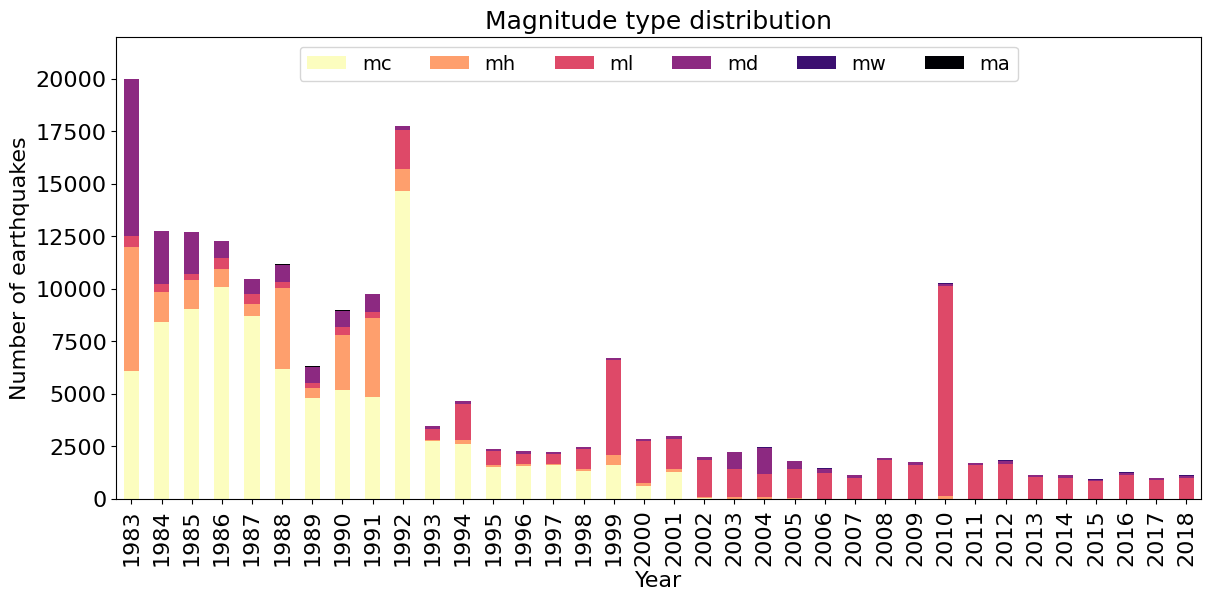

In [10]:
# Settings for all figures
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 18
plt.rcParams['font.size'] = 16
plt.rcParams['legend.fontsize'] = 14

df['dt_time'] = df['time'].apply(
    lambda x: datetime.strptime(x, '%Y-%m-%dT%H:%M:%S.%fZ'))

# Add an additional column for the year
df['year'] = df['dt_time'].apply(lambda x: x.year)

# Groupby year
df_cut = df[['year', 'magType']]
df_magType = df_cut.groupby('year')['magType'].value_counts().unstack()

# Keep only the top 6 magnitude types for plotting
df_magType = df_magType[mag_keep]

# Plot the dataFrame as a stacked bar chart
ax = df_magType.plot(kind='bar', stacked=True,
                     colormap='magma_r', figsize=(14,6))
ax.set_ylim([0, 22000])
ax.legend(loc='upper center', ncol=6)
plt.xlabel('Year'), plt.ylabel('Number of earthquakes')
plt.title('Magnitude type distribution')
plt.show()

In [7]:
# Cut out years 1970 - 1982
df = df[df.year > 1982]

# Print the minimum year in the column
print("Earliest year of data:",min(df['year']))

# Total number of earthquakes
N_tot = df['mag'].count()
print('Total Jumlah EQ:', N_tot)

Earliest year of data: 1983
Total Jumlah EQ: 187531


**Gutenberg–Richter law**

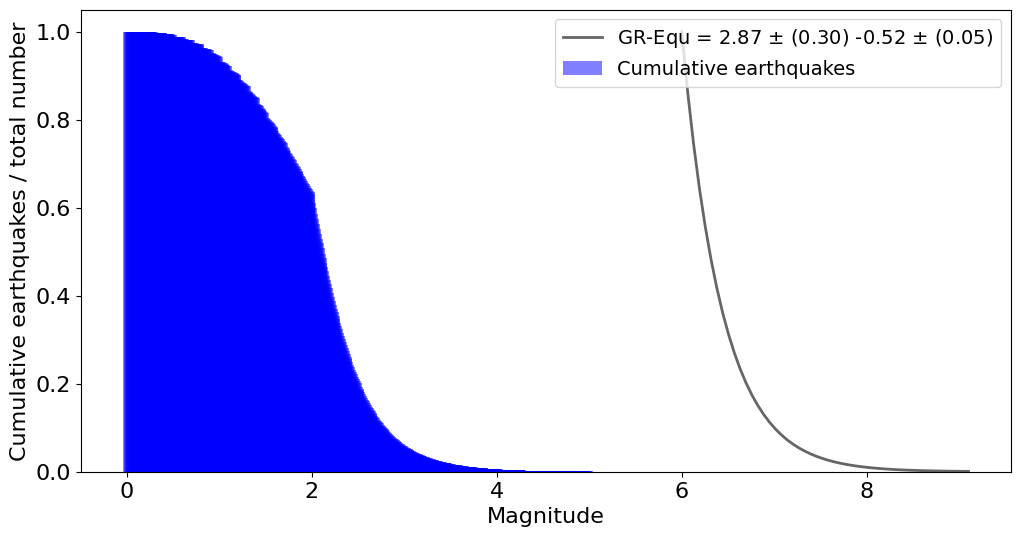

In [8]:
# Number of earthquakes by magnitude
mag_tot = df['mag'].value_counts()
mag_tot.sort_index(axis=0, inplace=True)

# Convert the indices of the Series to an np.ndarray
mags = np.asarray(mag_tot.index)

# between 6.0 and 9.1 (step=0.1)
mags_all = np.linspace(6.0,9.1,num=32)


magnitudes = np.arange(6,9,0.5)
counts = np.zeros(magnitudes.shape[0])

# compute the number of events with magnitude M >= m
i = 0
for m in magnitudes:
    counts[i] = df[df['mag'] >= m]['mag'].count()
    i += 1

# normalize
norm = np.sum(counts)
counts_n = counts/norm

# filter by removing empty data
counts_n_f = counts_n[counts_n!=0]
magnitudes_f = magnitudes[counts_n!=0]

# Add values for missing magnitudes
#mag_add = pd.Series(data=np.zeros(len(mags_miss)), index = mags_miss)
#mag_tot = pd.concat([mag_tot, mag_add])
mag_tot = pd.concat([mag_tot])
mag_tot.sort_index(axis=0, inplace=True)

mag_Ntot = np.cumsum(mag_tot.values[::-1])[::-1]

# Plot Gutenberg-Richter relationship: N = 10**(a-bM)
a = np.log10(1)+6
M = np.linspace(6, 9.1)
N = np.power(10, (a-M))

# compute linear regression
reg = stats.linregress(magnitudes_f, np.log10(counts_n_f))


label = r'GR-Equ = {:.2f} $\pm$ ({:.2f})'.format(reg.intercept, reg.intercept_stderr) + r' {:.2f} $\pm$ ({:.2f})'.format(reg.slope, reg.stderr)

plt.figure(figsize=(12,6))
ax1 = plt.bar(mag_tot.index, mag_Ntot/N_tot,
              width=0.08, color='blue', alpha=0.5,
              label='Cumulative earthquakes')
ax2 = plt.plot(M, N, 'k', linewidth = 2, alpha=0.6,
         label=label)

plt.ylabel('Cumulative earthquakes / total number')
plt.xlabel('Magnitude')
plt.legend()
plt.show()